In [8]:
import sys

import groupmeme
import groupmeme.api as api
import groupmeme.group as group
import json

import pandas as pd
import numpy as np
import cufflinks as cf

import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline  


In [9]:
CLIENT = api.GroupmeClient()
groups = CLIENT.get_groups()

selected_group = "SEP Actives" # Change this!!

sep_dict = groups[selected_group]
sep = group.Group(sep_dict["id"])


sep.collect_messages()
sep.handle_messages()

In [10]:
messages = sep.messages
messages["created_at"] = pd.to_datetime(messages["created_at"], unit="s")

new_messages = messages.groupby("created_at").size()
to_plot = new_messages.resample("D", how=np.sum)
to_plot = to_plot[to_plot.index.year == 2015]

In [12]:
rush = (pd.datetime(2015, 9, 2),pd.datetime(2015, 9, 9))
summer = (pd.datetime(2015, 5, 20), pd.datetime(2015, 8, 18))
spring = (pd.datetime(2015, 3, 23), pd.datetime(2015, 2, 27))

events = {"rush" : rush, "summer" : summer, "spring break" : spring}

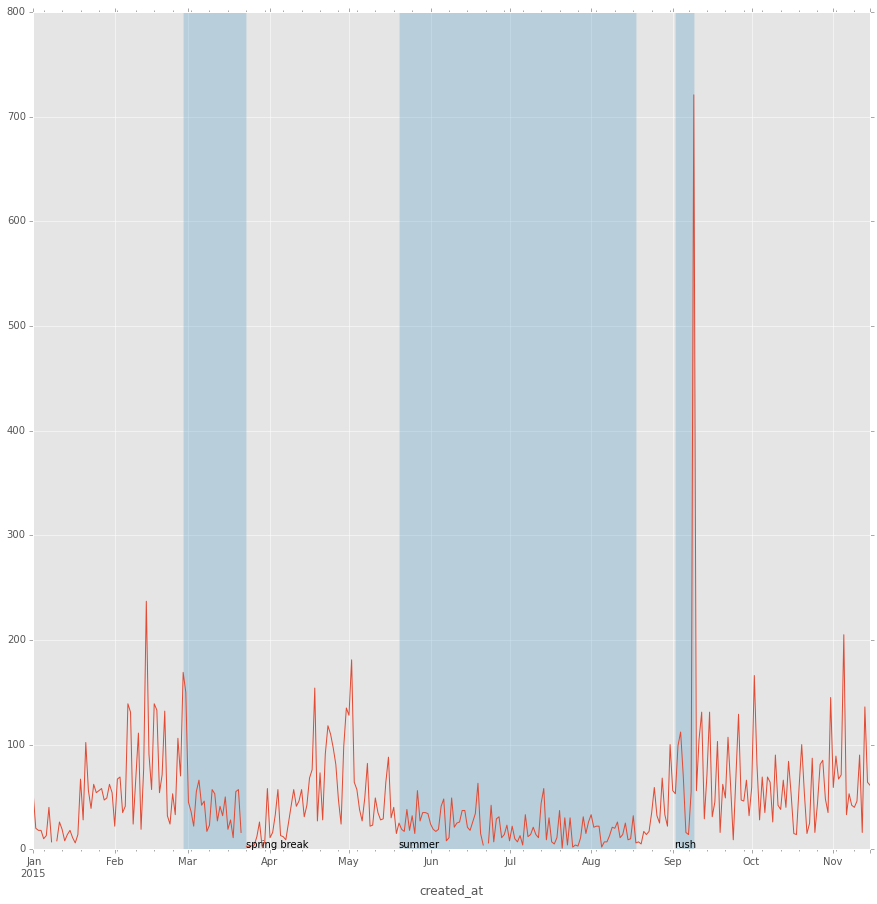

In [13]:
to_plot.plot(figsize=(15,15))

for event, daterange in events.items():
    plt.axvspan(daterange[0],daterange[1], alpha=0.25)
    plt.annotate(event, 
             xy=(daterange[0], 0.75),  
             xycoords='data',
             arrowprops=dict(arrowstyle="->"))